<a href="https://colab.research.google.com/github/ikabrain/UML501-Machine-Learning-Lab/blob/main/ML_assign5/ML_assign5.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Lab Assignment 5
---

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

## Q1: Ridge Regression using Gradient Descent Optimization
---

Generate a dataset with atleast seven highly correlated columns and a target variable.

Implement Ridge Regression using Gradient Descent Optimization.

Take different values of learning rate (such as $0.0001$, $0.001$, $0.01$, $0.1$, $1$, $10$) and regularization parameter ($10^{-15}$, $10^{-10}$,$10^{-5}$,$10^{-3}$, $0$, $1$, $10$, $20$).

Choose the best parameters for which ridge
regression cost function is minimum and R2_score is maximum.

In [ ]:
n_samples = 1000
n_feats = 9
n_corr = 7

n_total = n_feats + 1
n_actual = n_feats - n_corr + 1

In [ ]:
# GENERATING DATASET

# Generating uncorrelated dataset using sklearn
from sklearn.datasets import make_regression

X_base, y = make_regression(
    n_samples = n_samples,
    n_features = n_actual,
    n_informative = n_actual,
    noise = 10,
    shuffle = True,
    coef = False,
    random_state = 42
)

df = pd.DataFrame(X_base, columns = [f"X{i}" for i in range(1, n_actual + 1)])

# Making uncorrelated dataset into highly correlated one
for i in range(n_actual + 1, n_feats + 1):
    df[f"X{i}"] = df["X1"] + np.random.normal(0, 0.5, len(df))

# Appending target variable
df["Y"] = y

df.head()

,X1,X2,X3,X4,X5,X6,X7,X8,X9,Y
0,-0.189120,-1.330314,0.921650,-0.550030,-0.114620,-0.762845,0.438152,0.110322,-0.481559,-96.182753
1,-0.653329,-0.474945,1.765454,-1.067439,-0.588763,-1.129599,-0.276974,-0.291810,-0.339883,-60.287273
2,-0.224856,0.076852,-0.650003,0.613286,0.681336,-0.043076,-0.172671,0.778558,0.707977,-28.193682
3,0.570599,-0.662624,-0.763259,0.430194,0.415800,0.423497,0.572985,0.699404,0.479674,-12.697170
4,0.327880,-0.125454,0.085893,1.271901,0.579562,1.437207,0.016807,-1.054466,0.062284,11.714149


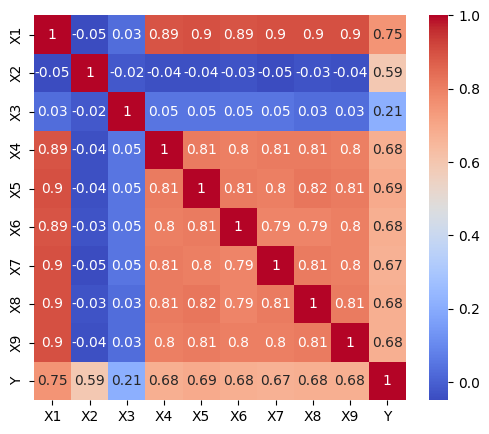

In [ ]:
# Judging correlation
plt.figure(figsize=(6, 5))
sns.heatmap(df.corr().round(2), annot = True, cmap="coolwarm")
plt.show()

In [ ]:
# IMPLEMENTING GRADIENT DESCENT FOR L2-NORMALISED RIDGE REGRESSION

# Step-1: Find gradient of new loss function with regularisation parameter 'l'
def D_SSE_L2(X, y, beta, r):
    n, k = X.shape
    # Again, we assume X has a column of 1's for intercept
    X = np.insert(X, 0, 1, axis=1)
    # We need a matrix denoting 'Ip' i.e. identity matrix with null row and columns prepended to it
    # This is so that the GD model will ignore optimising the intercept
    Ip = np.eye(k+1)
    Ip[0, 0] = 0
    return ((-1/n) * (X.T @ (y - X @ beta))) + ((r/n * Ip) @ beta)

def GDRidgeRegression(X, y, r=0, lr=0.01, n_iter=1000):
    n, k = X.shape
    # Step-2: Assume initial constants = 0
    beta = np.zeros(k+1)

    for _ in range(n_iter):
        # Step-3: Find gradient at assumed coefficients
        grad = D_SSE_L2(X, y, beta, r)
        # Step-4: Step size
        step_size = grad * lr
        # Step-5: New beta
        beta -= step_size

        # safety: break if numbers blow up
        if np.any(np.isnan(beta)) or np.any(np.isinf(beta)):
            raise ValueError(f"Diverged for lr={lr}, r={r}")

    return beta

In [ ]:
# Train-test split
from sklearn.model_selection import train_test_split

X = df.drop("Y", axis=1)
y = df["Y"]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
# Running GDR for different learning rates and regularisation parameters, and getting R2 score
from sklearn.metrics import r2_score

lr = [0.0001 , 0.001, 0.01, 0.1, 1, 10]
r_params = [1e-15, 1e-10, 1e-5, 1e-3, 0, 1, 10, 20]
epoch = 1000

betas = []
r2_scores = []
for r in r_params:
    for l in lr:
        print(f"REGULARISATION PARAMETER {r} ON LEARNING RATE {l}: ", end="")

        try:
            best_betas = GDRidgeRegression(X_train, y_train, r, l, epoch)
            betas.append(best_betas)

            y_pred = (X_test @ best_betas[1:]) + best_betas[0]
            r2_scores.append(r2_score(y_test, y_pred))
            print(f"R2 score = {r2_scores[-1]}")
        except ValueError:
            print(f"❌ Diverged")
            betas.append(None)
            r2_scores.append(-np.inf)
            continue

REGULARISATION PARAMETER 1e-15 ON LEARNING RATE 0.0001: R2 score = 0.4917067264178159
REGULARISATION PARAMETER 1e-15 ON LEARNING RATE 0.001: R2 score = 0.9170525661649592
REGULARISATION PARAMETER 1e-15 ON LEARNING RATE 0.01: R2 score = 0.9846232757987483
REGULARISATION PARAMETER 1e-15 ON LEARNING RATE 0.1: R2 score = 0.993676005765203
REGULARISATION PARAMETER 1e-15 ON LEARNING RATE 1: ❌ Diverged
REGULARISATION PARAMETER 1e-15 ON LEARNING RATE 10: ❌ Diverged
REGULARISATION PARAMETER 1e-10 ON LEARNING RATE 0.0001: R2 score = 0.4917067264178139
REGULARISATION PARAMETER 1e-10 ON LEARNING RATE 0.001: R2 score = 0.9170525661649486
REGULARISATION PARAMETER 1e-10 ON LEARNING RATE 0.01: R2 score = 0.9846232757987456
REGULARISATION PARAMETER 1e-10 ON LEARNING RATE 0.1: R2 score = 0.9936760057652012
REGULARISATION PARAMETER 1e-10 ON LEARNING RATE 1: ❌ Diverged
REGULARISATION PARAMETER 1e-10 ON LEARNING RATE 10: ❌ Diverged
REGULARISATION PARAMETER 1e-05 ON LEARNING RATE 0.0001: R2 score = 0.491706

In [ ]:
# Getting best learning rate & regularisation parameter

best_idx = np.argmax(r2_scores)

print(f"Best regularisation parameter = {r_params[best_idx]} with learning rate = {lr[best_idx]} having")
print(f"\tTest R2 score = {r2_scores[best_idx]}")
print(f"\t& Beta values = {betas[best_idx].tolist()}")

Best regularisation parameter = 0.001 with learning rate = 0.1 having
	Test R2 score = 0.993676005765203
	& Beta values = [-0.42102760432672426, 95.79714873197179, 82.91076960956988, 25.823828731762188, -0.06114205843511442, 0.7531026443398969, 0.28504338808500507, 0.25938372789002623, 0.5788754569923065, 0.712630011239677]


As we can see with ridge regression, for highly correlated & redundant features $X4$ to $X9$, corresponding regression coefficients $\beta_4$ to $\beta_9$ are very small & have been penalised.

# Q2. Hitters dataset
---

Load the Hitters dataset from the following link

https://drive.google.com/file/d/1qzCKF6JKKMB0p7ul_lLy8tdmRk3vE_bG/view?usp=sharing

In [ ]:
!curl -L -o /content/hitters.zip https://www.kaggle.com/api/v1/datasets/download/floser/hitters
!unzip -o hitters.zip
!rm hitters.zip

  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
  0     0    0     0    0     0      0      0 --:--:-- --:--:-- --:--:--     0
100  9173  100  9173    0     0  13104      0 --:--:-- --:--:-- --:--:-- 13104
Archive:  hitters.zip
  inflating: Hitters.csv             


In [ ]:
df = pd.read_csv("/content/Hitters.csv")
df.head()

,AtBat,Hits,HmRun,Runs,RBI,Walks,Years,CAtBat,CHits,CHmRun,CRuns,CRBI,CWalks,League,Division,PutOuts,Assists,Errors,Salary,NewLeague
0,293,66,1,30,29,14,1,293,66,1,30,29,14,A,E,446,33,20,NaN,A
1,315,81,7,24,38,39,14,3449,835,69,321,414,375,N,W,632,43,10,475.0,N
2,479,130,18,66,72,76,3,1624,457,63,224,266,263,A,W,880,82,14,480.0,A
3,496,141,20,65,78,37,11,5628,1575,225,828,838,354,N,E,200,11,3,500.0,N
4,321,87,10,39,42,30,2,396,101,12,48,46,33,N,E,805,40,4,91.5,N


In [ ]:
df.shape

(322, 20)

### (a) Pre-process the data (null values, noise, categorical to numerical encoding)

In [ ]:
df.isna().any(axis=1).sum()

np.int64(59)

### (b) Separate input and output features and perform scaling

### (c) Fit a Linear, Ridge (use regularization parameter as 0.5748), and LASSO (use regularization parameter as 0.5748) regression function on the dataset

### (d) Evaluate the performance of each trained model on test set. Which model performs the best and why?

# Q3: Cross Validation for Ridge and Lasso Regression
---

Explore Ridge Cross Validation (RidgeCV) and Lasso Cross Validation (LassoCV)
function of Python. Implement both on Boston House Prediction Dataset (load_boston
dataset from sklearn.datasets).

# Q4: Multiclass Logistic Regression
---

Implement Multiclass Logistic Regression (step-by step)
on Iris dataset using one vs. rest strategy